# Classification algorithms
# Dataset: Customer churn prediction 2020

* predicting which clients are most likely to cancel a subscription i.e 'leave a company' based on their usage of the service

In [123]:
# importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [124]:
# reading csv file

df = pd.read_csv(r"C:\Users\saikumar\Desktop\Library\Machine Learning\Datasets\customer-churn-prediction-2020\train.csv")

In [125]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [126]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [127]:
df.shape

(4250, 20)

In [128]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

# Cleaning the data

* First, calculate the total_net_minutes to reduce the number of features; we are going to do the same with calls, and charge

* Second, we are going to convert all yes, no strings into 0's and 1's such as in columns (voice_mail_plan, international_plan, and churn)

* Then, we are going to convert the categorical values into onehote vectors such as (state, and area_code)

* Lastly, drop all repeted features and useless columns such as area (code and state)

In [130]:
def clean_Data(df):    
    df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


    df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
    df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 

    df.drop(columns= ['state', 'area_code'], inplace= True)
    #df.area_code = pd.Categorical(df.area_code).codes



    df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                    'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                     'total_eve_minutes', 'total_night_minutes'], inplace=True)
    return df

In [131]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

# Splitting the dataset

* We are going to use sklearn to split the data
* First, we need to split the dataframe into x, y
* Then, use train-test-spilt function to split the data
* Use random state to have same data each time you run the program
* Use stratify to cut the data with the same portion

In [132]:
from sklearn.model_selection import train_test_split 

X = df.drop(columns= ['churn'])
y = df['churn']

x_train, x_val, y_train, y_val = train_test_split(X, y , test_size=.25, stratify= y, random_state=1) 
print(y_train.value_counts())
print(y_val.value_counts())

no     2739
yes     448
Name: churn, dtype: int64
no     913
yes    150
Name: churn, dtype: int64


# Perform the cleaning by calling the clean function

In [133]:
x_train  = clean_Data(x_train)
y_train = pd.Categorical(y_train).codes

x_val  = clean_Data(x_val)
y_val= pd.Categorical(y_val).codes

print(df.international_plan.value_counts())
df.head()

no     3854
yes     396
Name: international_plan, dtype: int64


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Display all numerical columns in the data

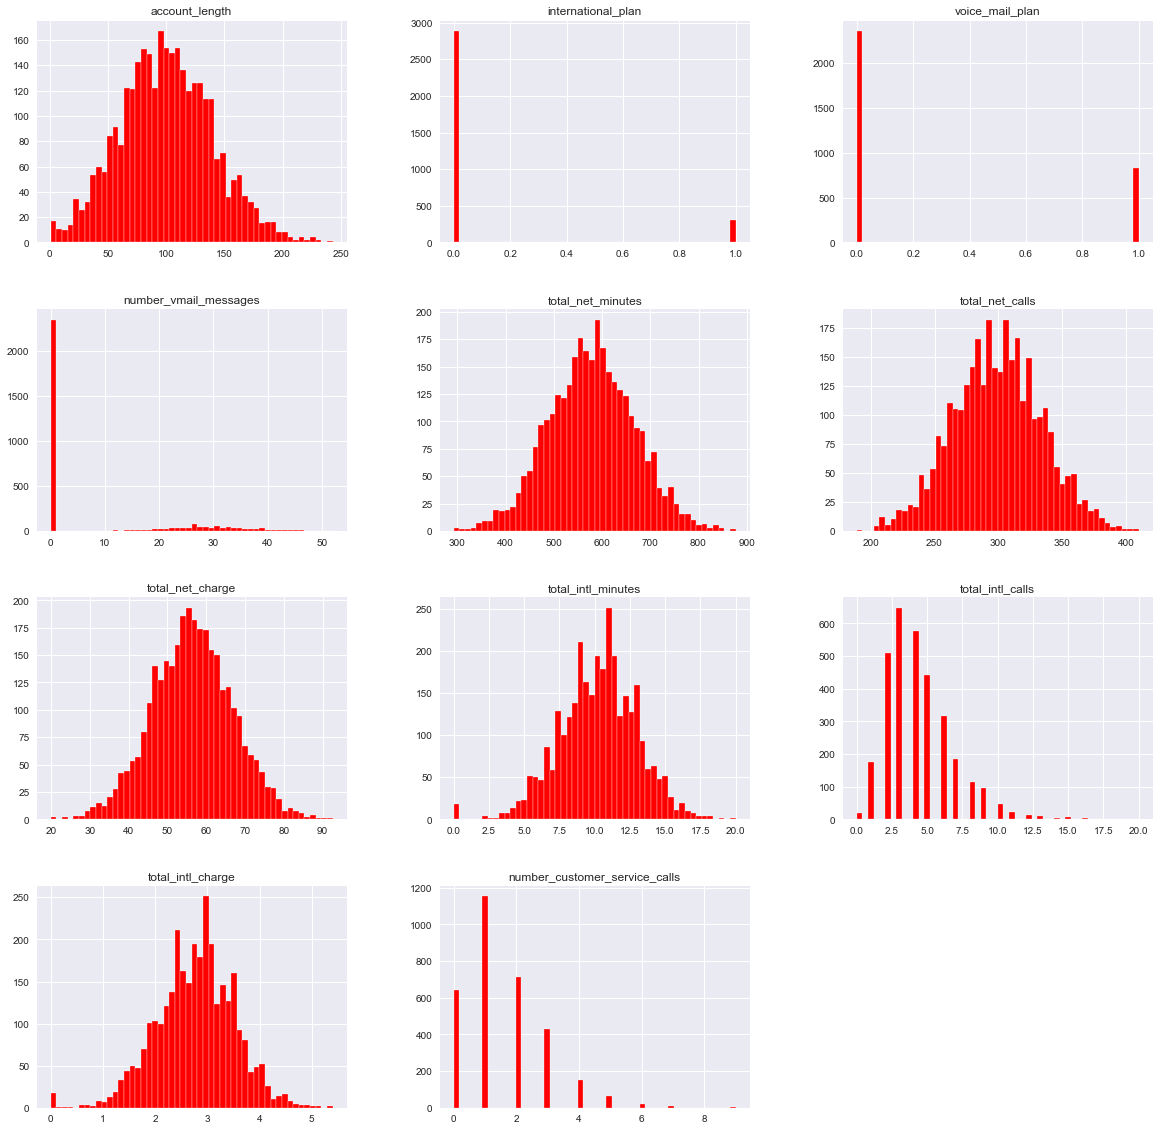

In [134]:
import seaborn as sns
sns.set_style('dark')
temp = x_train[['account_length', 'international_plan','voice_mail_plan', 'number_vmail_messages', 
           'total_net_minutes','total_net_calls', 'total_net_charge','total_intl_minutes',
       'total_intl_calls', 'total_intl_charge','number_customer_service_calls' ]]
temp.hist(bins=50,figsize=(20,20),color='red');

In [135]:
print(x_train.shape, y_train.shape)

(3187, 11) (3187,)


# Model

# 1.Logistic Regression

In [137]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logi_model  = LogisticRegression(max_iter=300, C= 1.0, penalty= 'l2', solver= 'liblinear')
logi_model.fit(x_train,y_train)
y_val_pred_logi = logi_model.predict(x_val)
y_train_pred_logi = logi_model.predict(x_train)
print(accuracy_score(y_train, y_train_pred_logi))
print(accuracy_score(y_val, y_val_pred_logi))

0.8710385942893003
0.8598306679209784


C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

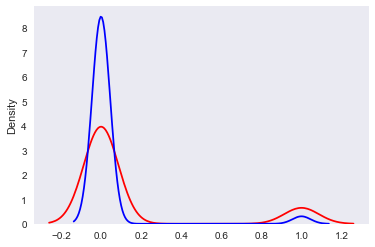

In [139]:
ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(y_val_pred_logi, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [140]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_logi))
print(classification_report(y_val, y_val_pred_logi))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2739
           1       0.63      0.20      0.31       448

    accuracy                           0.87      3187
   macro avg       0.76      0.59      0.62      3187
weighted avg       0.85      0.87      0.84      3187

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       913
           1       0.51      0.13      0.20       150

    accuracy                           0.86      1063
   macro avg       0.69      0.55      0.56      1063
weighted avg       0.82      0.86      0.82      1063



<AxesSubplot:>

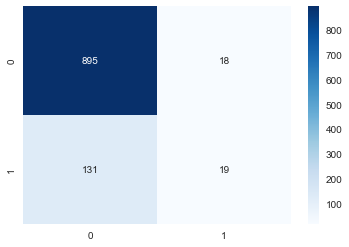

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_val_pred_logi), annot=True, cmap='Blues', fmt='g')

In [142]:
y_val.shape

(1063,)

In [143]:
x_val.shape

(1063, 11)

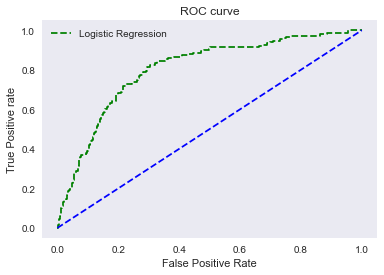

In [144]:
from sklearn.metrics import roc_curve

# roc curve for models
pred_prob = logi_model.predict_proba(x_val)
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [145]:
# to ignore warnings

# import warnings
# warnings.filterwarnings('ignore',category = DeprecationWarning)

# K-nearest Neighbors

In [146]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model  = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 13, weights = 'distance')
knn_model.fit(x_train,y_train)
y_val_pred_knn = knn_model.predict(x_val)
y_train_pred_knn = knn_model.predict(x_train)
print(accuracy_score(y_train, y_train_pred_knn))
print(accuracy_score(y_val, y_val_pred_knn))

1.0
0.8871119473189087


In [148]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_knn))
print(classification_report(y_val, y_val_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2739
           1       1.00      1.00      1.00       448

    accuracy                           1.00      3187
   macro avg       1.00      1.00      1.00      3187
weighted avg       1.00      1.00      1.00      3187

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       913
           1       0.75      0.30      0.43       150

    accuracy                           0.89      1063
   macro avg       0.82      0.64      0.68      1063
weighted avg       0.87      0.89      0.87      1063



<AxesSubplot:>

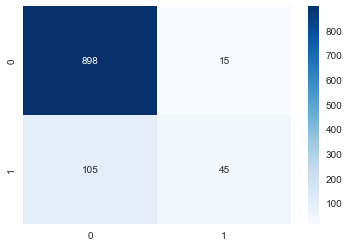

In [209]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, cmap='Blues', fmt='g')

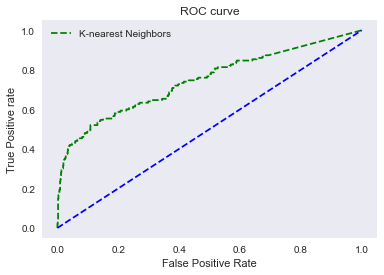

In [150]:
from sklearn.metrics import roc_curve

# roc curve for models
pred_prob = knn_model.predict_proba(x_val)
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='K-nearest Neighbors')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

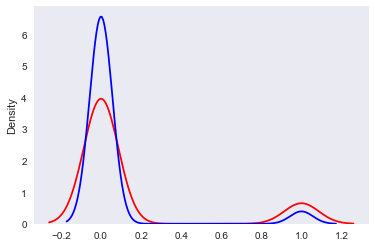

In [151]:
ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(y_val_pred_knn, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Support Vector Machines

In [152]:
# example of grid searching key hyperparametres for SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.870934 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [153]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model  = SVC(C= 50, gamma= 'scale', kernel= 'rbf', probability = True)
svm_model.fit(x_train,y_train)
y_val_pred_svm = svm_model.predict(x_val)
y_train_pred_svm = svm_model.predict(x_train)
print(accuracy_score(y_train, y_train_pred_svm))
print(accuracy_score(y_val, y_val_pred_svm))

0.8719799184185755
0.8758231420507996


In [154]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_svm))
print(classification_report(y_val, y_val_pred_svm))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2739
           1       0.90      0.10      0.18       448

    accuracy                           0.87      3187
   macro avg       0.89      0.55      0.56      3187
weighted avg       0.88      0.87      0.83      3187

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       913
           1       0.95      0.13      0.22       150

    accuracy                           0.88      1063
   macro avg       0.91      0.56      0.58      1063
weighted avg       0.89      0.88      0.83      1063



<AxesSubplot:>

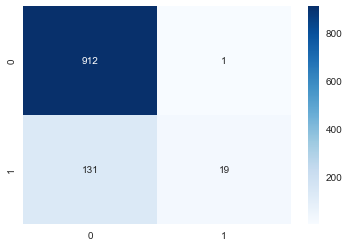

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, cmap='Blues', fmt='g')

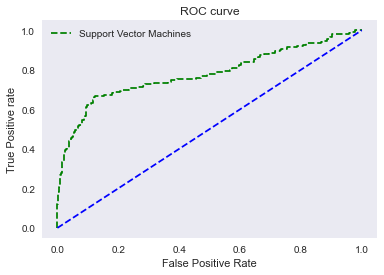

In [156]:
from sklearn.metrics import roc_curve

# roc curve for models
pred_prob = svm_model.predict_proba(x_val)
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Support Vector Machines')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

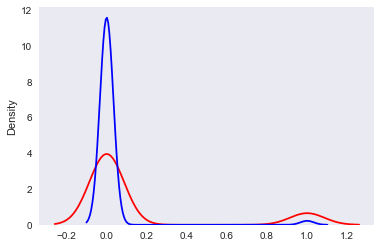

In [157]:
ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(y_val_pred_svm, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Random Forest

In [158]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.973014 using {'max_features': 'log2', 'n_estimators': 1000}


In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model  = RandomForestClassifier(max_features= 'sqrt', n_estimators= 1000)
rf_model.fit(x_train,y_train)
y_val_pred_rf = rf_model.predict(x_val)
y_train_pred_rf = rf_model.predict(x_train)
print(accuracy_score(y_train, y_train_pred_rf))
print(accuracy_score(y_val, y_val_pred_rf))

1.0
0.9774223894637818


In [160]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_rf))
print(classification_report(y_val, y_val_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2739
           1       1.00      1.00      1.00       448

    accuracy                           1.00      3187
   macro avg       1.00      1.00      1.00      3187
weighted avg       1.00      1.00      1.00      3187

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       0.99      0.85      0.91       150

    accuracy                           0.98      1063
   macro avg       0.98      0.92      0.95      1063
weighted avg       0.98      0.98      0.98      1063



<AxesSubplot:>

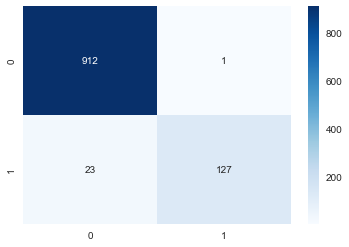

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_val_pred_rf), annot=True, cmap='Blues', fmt='g')

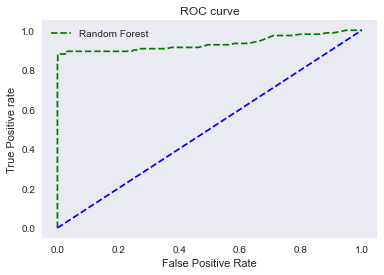

In [162]:
from sklearn.metrics import roc_curve

# roc curve for models
pred_prob = rf_model.predict_proba(x_val)
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

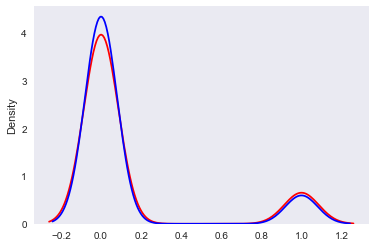

In [163]:
ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(y_val_pred_rf, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Gradient Boosting Classifier or Stochastic Gradient Boosting

In [164]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.974271 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 1.0}


In [165]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gradbo_model  = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 1000, subsample = 1.0)
gradbo_model.fit(x_train,y_train)
y_val_pred_gradbo = gradbo_model.predict(x_val)
y_train_pred_gradbo = gradbo_model.predict(x_train)
print(accuracy_score(y_train, y_train_pred_gradbo))
print(accuracy_score(y_val, y_val_pred_gradbo))

1.0
0.9783631232361242


In [166]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_gradbo))
print(classification_report(y_val, y_val_pred_gradbo))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2739
           1       1.00      1.00      1.00       448

    accuracy                           1.00      3187
   macro avg       1.00      1.00      1.00      3187
weighted avg       1.00      1.00      1.00      3187

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       0.99      0.85      0.92       150

    accuracy                           0.98      1063
   macro avg       0.98      0.93      0.95      1063
weighted avg       0.98      0.98      0.98      1063



<AxesSubplot:>

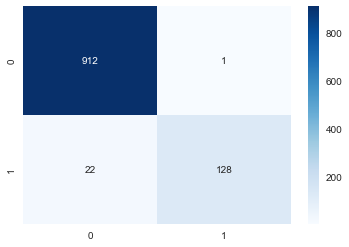

In [167]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_val_pred_gradbo), annot=True, cmap='Blues', fmt='g')

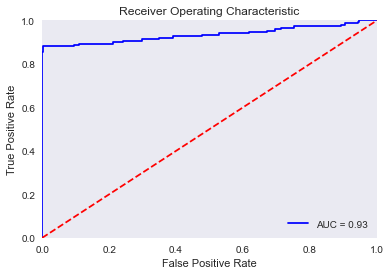

In [168]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gradbo_model.predict_proba(x_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

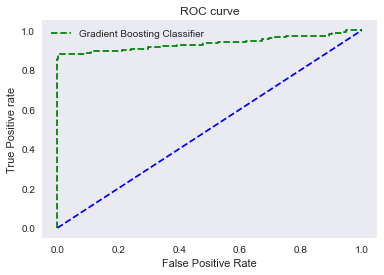

In [169]:
from sklearn.metrics import roc_curve

# roc curve for models
pred_prob = gradbo_model.predict_proba(x_val)
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Gradient Boosting Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

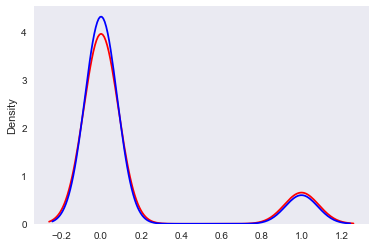

In [170]:
ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(y_val_pred_gradbo, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Decision Tree

In [171]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, return_train_score=True)

# Fit it to the data
tree_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 8}
Best score is 0.9664261846527855


In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

deci_model  = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, max_features = 3, min_samples_leaf = 1)
deci_model.fit(x_train,y_train)
y_val_pred_deci = rf_model.predict(x_val)
y_train_pred_deci = rf_model.predict(x_train)
print(accuracy_score(y_train, y_train_pred_deci))
print(accuracy_score(y_val, y_val_pred_deci))

1.0
0.9774223894637818


In [173]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_deci))
print(classification_report(y_val, y_val_pred_deci))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2739
           1       1.00      1.00      1.00       448

    accuracy                           1.00      3187
   macro avg       1.00      1.00      1.00      3187
weighted avg       1.00      1.00      1.00      3187

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       0.99      0.85      0.91       150

    accuracy                           0.98      1063
   macro avg       0.98      0.92      0.95      1063
weighted avg       0.98      0.98      0.98      1063



<AxesSubplot:>

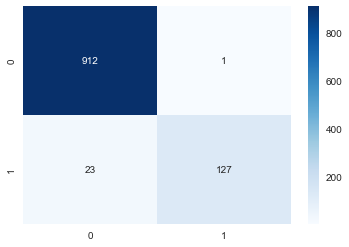

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_val_pred_deci), annot=True, cmap='Blues', fmt='g')

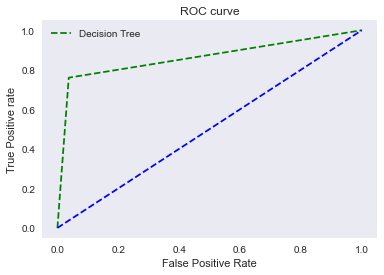

In [175]:
from sklearn.metrics import roc_curve

# roc curve for models
pred_prob = deci_model.predict_proba(x_val)
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

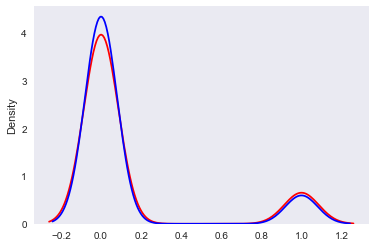

In [176]:
ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(y_val_pred_deci, hist=False, color="b", label="Fitted Values" , ax=ax1)

# NAIVE BAYES

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

print("Tuned MLPClassifier Parameters: {}".format(gs_NB.best_params_))
print("Best score is {}".format(gs_NB.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned MLPClassifier Parameters: {'var_smoothing': 1.2328467394420658e-05}
Best score is 0.8908146041150967


In [178]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB(var_smoothing = 1.2328467394420658e-05)
naive_model.fit(x_train, y_train)
y_val_pred_naive = naive_model.predict(x_val)
y_train_pred_naive = naive_model.predict(x_train)
print(accuracy_score(y_train, y_train_pred_naive))
print(accuracy_score(y_val, y_val_pred_naive))

0.8936303733919047
0.8936970837253058


In [179]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_naive))
print(classification_report(y_val, y_val_pred_naive))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2739
           1       0.69      0.44      0.54       448

    accuracy                           0.89      3187
   macro avg       0.80      0.70      0.74      3187
weighted avg       0.88      0.89      0.88      3187

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       913
           1       0.68      0.46      0.55       150

    accuracy                           0.89      1063
   macro avg       0.80      0.71      0.74      1063
weighted avg       0.88      0.89      0.88      1063



<AxesSubplot:>

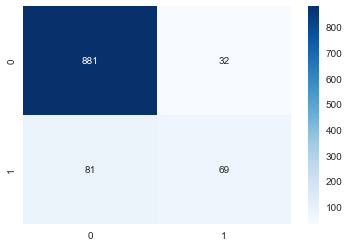

In [180]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_val_pred_naive), annot=True, cmap='Blues', fmt='g')

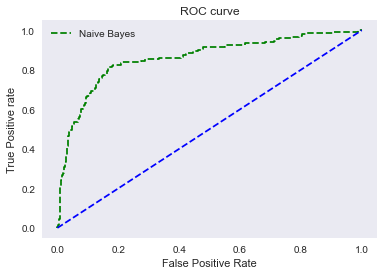

In [181]:
from sklearn.metrics import roc_curve

# roc curve for models
pred_prob = naive_model.predict_proba(x_val)
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

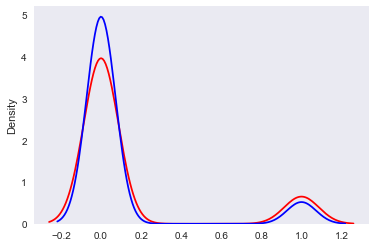

In [203]:
ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(y_val_pred_naive, hist=False, color="b", label="Fitted Values" , ax=ax1)

# MLP CLASSIFIER

In [182]:
print(x_train.shape, y_train.shape)

(3187, 11) (3187,)


In [183]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

#print the tuned parameters
print("Tuned MLPClassifier Parameters: {}".format(clf.best_params_))
print("Best score is {}".format(clf.best_score_))


Tuned MLPClassifier Parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best score is 0.8707264673350424


In [189]:
# Create model object
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate='adaptive',
                    activation='relu',
                    solver='adam',
                    alpha=0.05)

# Fit data onto the model
MLP_model.fit(x_train,y_train)
y_val_pred_MLP = MLP_model.predict(x_val)
y_train_pred_MLP = MLP_model.predict(x_train)
print(accuracy_score(y_train, y_train_pred_MLP))
print(accuracy_score(y_val, y_val_pred_MLP))

Iteration 1, loss = 5.06876301
Iteration 2, loss = 5.06867834
Iteration 3, loss = 4.99430881
Iteration 4, loss = 4.08809633
Iteration 5, loss = 2.85332817
Iteration 6, loss = 2.55442418
Iteration 7, loss = 2.35098280
Iteration 8, loss = 2.16821600
Iteration 9, loss = 2.00483494
Iteration 10, loss = 1.84143475
Iteration 11, loss = 1.68707684
Iteration 12, loss = 1.53460992
Iteration 13, loss = 1.36716342
Iteration 14, loss = 1.14863813
Iteration 15, loss = 0.93242658
Iteration 16, loss = 0.78720009
Iteration 17, loss = 0.71778358
Iteration 18, loss = 0.66965631
Iteration 19, loss = 0.63313614
Iteration 20, loss = 0.59673086
Iteration 21, loss = 0.56206633
Iteration 22, loss = 0.53650207
Iteration 23, loss = 0.51989974
Iteration 24, loss = 0.50135344
Iteration 25, loss = 0.49115699
Iteration 26, loss = 0.47630180
Iteration 27, loss = 0.46665066
Iteration 28, loss = 0.45605412
Iteration 29, loss = 0.44655764
Iteration 30, loss = 0.43584691
Iteration 31, loss = 0.43016677
Iteration 32, los

C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [190]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_MLP))
print(classification_report(y_val, y_val_pred_MLP))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2739
           1       0.62      0.02      0.04       448

    accuracy                           0.86      3187
   macro avg       0.74      0.51      0.48      3187
weighted avg       0.83      0.86      0.80      3187

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       913
           1       0.40      0.01      0.03       150

    accuracy                           0.86      1063
   macro avg       0.63      0.51      0.47      1063
weighted avg       0.80      0.86      0.80      1063



<AxesSubplot:>

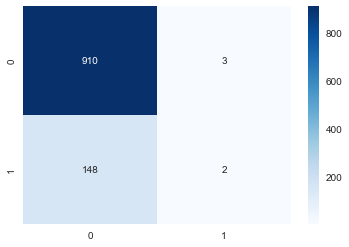

In [191]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_val_pred_MLP), annot=True, cmap='Blues', fmt='g')

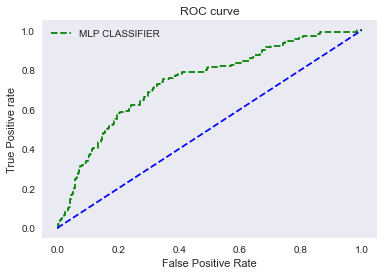

In [192]:
from sklearn.metrics import roc_curve

# roc curve for models
pred_prob = MLP_model.predict_proba(x_val)
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='MLP CLASSIFIER')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

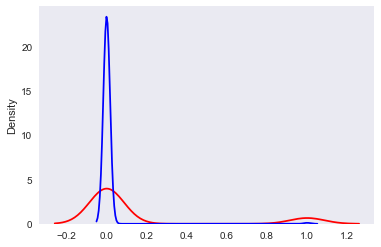

In [204]:
ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(y_val_pred_MLP, hist=False, color="b", label="Fitted Values" , ax=ax1)

# XGBOOST CLASSIFIER

In [195]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBClassifier(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.1695888335793062


In [197]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgb_model = xgb.XGBClassifier(seed = 20,subsample= 0.5, n_estimators= 500, max_depth= 5, learning_rate= 0.01, colsample_bytree = 0.7999999999999999, colsample_bylevel = 0.5)
# Fit data onto the model
xgb_model.fit(x_train,y_train)
y_val_pred_xgb = xgb_model.predict(x_val)
y_train_pred_xgb = xgb_model.predict(x_train)
print(accuracy_score(y_train, y_train_pred_xgb))
print(accuracy_score(y_val, y_val_pred_xgb))

0.9770944461876373
0.9783631232361242


In [199]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_xgb))
print(classification_report(y_val, y_val_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2739
           1       0.99      0.84      0.91       448

    accuracy                           0.98      3187
   macro avg       0.98      0.92      0.95      3187
weighted avg       0.98      0.98      0.98      3187

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1063
   macro avg       0.99      0.92      0.95      1063
weighted avg       0.98      0.98      0.98      1063



<AxesSubplot:>

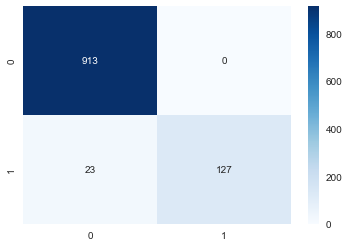

In [200]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_val_pred_xgb), annot=True, cmap='Blues', fmt='g')

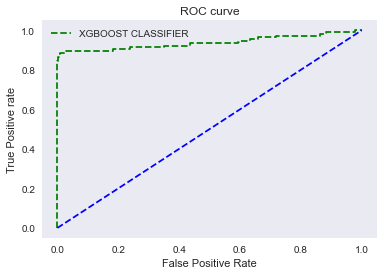

In [201]:
from sklearn.metrics import roc_curve

# roc curve for models
pred_prob = xgb_model.predict_proba(x_val)
fpr1, tpr1, thresh1 = roc_curve(y_val, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_val))]
p_fpr, p_tpr, _ = roc_curve(y_val, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='XGBOOST CLASSIFIER')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

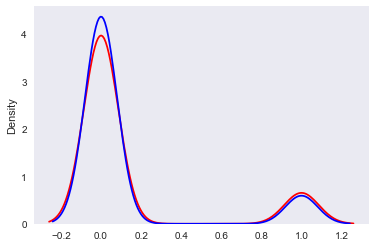

In [205]:
ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(y_val_pred_xgb, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [206]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["S.no", "Model", "Train_accuracy", "Test_accuracy"]
x.add_row(['1', 'Logistic regression', accuracy_score(y_train, y_train_pred_logi), accuracy_score(y_val, y_val_pred_logi)])
x.add_row(['2', 'KNN', accuracy_score(y_train, y_train_pred_knn), accuracy_score(y_val, y_val_pred_knn)])
x.add_row(['3', 'SVM', accuracy_score(y_train, y_train_pred_svm), accuracy_score(y_val, y_val_pred_svm)])
x.add_row(['4', 'Random forest', accuracy_score(y_train, y_train_pred_rf), accuracy_score(y_val, y_val_pred_rf)])
x.add_row(['5', 'Gradient Boosting', accuracy_score(y_train, y_train_pred_gradbo), accuracy_score(y_val, y_val_pred_gradbo)])
x.add_row(['6', 'Decision tree', accuracy_score(y_train, y_train_pred_deci), accuracy_score(y_val, y_val_pred_deci)])
x.add_row(['7', 'Naive Bayes', accuracy_score(y_train, y_train_pred_naive), accuracy_score(y_val, y_val_pred_naive)])
x.add_row(['8', 'MLP Classifier', accuracy_score(y_train, y_train_pred_MLP), accuracy_score(y_val, y_val_pred_MLP)])
x.add_row(['9', 'XGBoost Classifier', accuracy_score(y_train, y_train_pred_xgb), accuracy_score(y_val, y_val_pred_xgb)])
print(x)

+------+---------------------+--------------------+--------------------+
| S.no |        Model        |   Train_accuracy   |   Test_accuracy    |
+------+---------------------+--------------------+--------------------+
|  1   | Logistic regression | 0.8710385942893003 | 0.8598306679209784 |
|  2   |         KNN         |        1.0         | 0.8871119473189087 |
|  3   |         SVM         | 0.8719799184185755 | 0.8758231420507996 |
|  4   |    Random forest    |        1.0         | 0.9774223894637818 |
|  5   |  Gradient Boosting  |        1.0         | 0.9783631232361242 |
|  6   |    Decision tree    |        1.0         | 0.9774223894637818 |
|  7   |     Naive Bayes     | 0.8936303733919047 | 0.8936970837253058 |
|  8   |    MLP Classifier   | 0.8606840288672732 | 0.8579492003762935 |
|  9   |  XGBoost Classifier | 0.9770944461876373 | 0.9783631232361242 |
+------+---------------------+--------------------+--------------------+
